In [266]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import VarianceThreshold
from sklearn.preprocessing import LabelEncoder
import joblib

In [268]:
df = pd.read_csv('masterfinal.csv')
display(df.head())

,track_id,popularity,album_name,track_popularity,track_genre,genre_category,artist_name,track_name,acousticness,danceability,...,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence,loudness_binned
0,000RDCYioLteXcutOjeweY,48.0,Teeje Week,62.0,hip-hop,hip hop,Jordan Sandhu,Teeje Week,0.0583,0.679,...,0.0000,0.0,0.0825,-3.537,1.0,0.1900,161.721,4.0,0.839,High
1,013TFRzJWkT41RRSgSenfI,65.0,amo,52.0,metalcore,rock,Bring Me The Horizon,i don't know what to say,0.0154,0.499,...,0.0982,7.0,0.2460,-6.744,0.0,0.0550,92.449,4.0,0.239,High
2,01BC4Xj5tfsfV8DLDrma7q,65.0,Speak Your Mind (Deluxe),65.0,house,electronic,Anne-Marie,Ciao Adios,0.1360,0.694,...,0.0000,7.0,0.3220,-3.986,1.0,0.0934,106.098,4.0,0.501,High
3,01MVOl9KtVTNfFiBU9I7dc,57.0,Days I Will Remember,58.0,acoustic,acoustic,Tyrone Wells,Days I Will Remember,0.2890,0.688,...,0.0000,6.0,0.1890,-8.807,1.0,0.1050,98.017,4.0,0.666,High
4,01MVOl9KtVTNfFiBU9I7dc,57.0,Days I Will Remember,58.0,indie-pop,pop,Tyrone Wells,Days I Will Remember,0.2890,0.688,...,0.0000,6.0,0.1890,-8.807,1.0,0.1050,98.017,4.0,0.666,High


In [270]:
drop_cols = ['track_name', 'artist_name', 'album_name', 'track_id']
df_model = df.drop(columns=[col for col in drop_cols if col in df.columns])

In [272]:
bins = [0, 40, 70, 100]
labels = ['Low', 'Medium', 'High']
df_model['popularity_class'] = pd.cut(df_model['popularity'], bins=bins, labels=labels, include_lowest=True)

In [274]:
df_model['is_popular'] = (df_model['track_popularity'] >= 70).astype(int)
print("Binary popularity class distribution:")
print(df_model['is_popular'].value_counts())

Binary popularity class distribution:
is_popular
0    1235
1     332
Name: count, dtype: int64


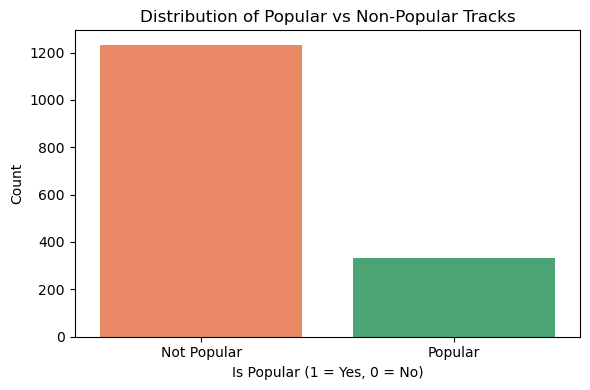

In [300]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(6, 4))
sns.countplot(x='is_popular', hue='is_popular', data=df_model, palette={0: 'coral', 1: 'mediumseagreen'}, legend=False)

plt.title('Distribution of Popular vs Non-Popular Tracks')
plt.xlabel('Is Popular (1 = Yes, 0 = No)')
plt.ylabel('Count')
plt.xticks([0, 1], ['Not Popular', 'Popular'])
plt.tight_layout()
plt.show()

In [276]:
le = LabelEncoder()
df_model['popularity_class'] = le.fit_transform(df_model['popularity_class'])

In [278]:
df_model = df_model.dropna()

In [280]:
for col in ['danceability', 'loudness', 'instrumentalness']:
    q_low = df_model[col].quantile(0.01)
    q_high = df_model[col].quantile(0.99)
    df_model[col] = df_model[col].clip(lower=q_low, upper=q_high)

In [282]:
df_encoded = pd.get_dummies(df_model, columns=['genre_category'], drop_first=True)

In [284]:
X = df_encoded.drop(columns=['track_popularity', 'popularity_class'])
y = df_encoded['popularity_class']

In [286]:
scaler = StandardScaler()
num_cols = X.select_dtypes(include=['float64', 'int64']).columns
X[num_cols] = scaler.fit_transform(X[num_cols])

In [302]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [304]:
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

X_train shape: (1251, 85)
X_test shape: (313, 85)
y_train shape: (1251,)
y_test shape: (313,)


In [306]:
X_train.to_csv("X_train.csv", index=False)
X_test.to_csv("X_test.csv", index=False)
y_train.to_csv("y_train.csv", index=False)
y_test.to_csv("y_test.csv", index=False)
joblib.dump(scaler, "scaler.joblib")
joblib.dump(le, "label_encoder.joblib")

['label_encoder.joblib']